<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Term Deposit Plan Subscriber for Bank</h1>
</div>


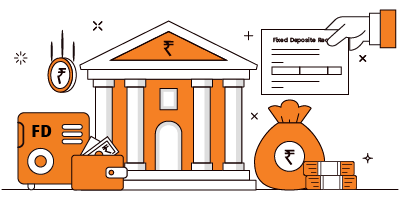

#### Author:- Aniket B. Barphe
#### LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
#### Platform:- Machine Hack (14 Nov - 14 Dec 2022)
#### Problem Statement:- Predict Term Deposit Plan Subscriber for Bank

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [182]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Model Evaluations
import sklearn as sk
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))
print('scikit-learn version {}'.format(sk.__version__))

CatBoost version 1.1.1
NumPy version 1.20.1
Pandas version 1.2.4
seaborn version 0.11.1
sklearn version 0.24.1
xgboost version 1.7.1
lightgbm version 3.3.3
scikit-learn version 0.24.1


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [183]:
train = pd.read_csv(r'C:\Users\abarphe\Favorites\MH\SPTS\train.csv')
test = pd.read_csv(r'C:\Users\abarphe\Favorites\MH\SPTS\test.csv')
submission = pd.read_csv(r'C:\Users\abarphe\Favorites\MH\SPTS\submission.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [184]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB
None 

Shape of Train Data:-

(21000, 17) 

----------------------------

In [185]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)

About Train Data:-

   age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  
0  cellular   15   apr       263         2     -1         0  unknown       0  
1   unknown    4   may       315         1     -1         0  unknown       0  
2  cellular   12   may       102         2     -1         0  unknown       0  
3  cellular   16   feb       197         1     -1         0  unknown       1  
4  cellular   19   sep       177         1     -1         0  success       0   

-----------------------------------------------------------

In [186]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

       age          job  marital  education default  balance housing loan  \
20995   26   technician  married  secondary      no      289      no   no   
20996   34   management  married   tertiary      no      122     yes   no   
20997   32  blue-collar  married   tertiary     yes      521      no  yes   
20998   40   technician  married  secondary      no     2092      no   no   
20999   48   technician   single    primary      no      509      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
20995   cellular    8   jul       102         3     -1         0  unknown   
20996   cellular   19   may       301         2     -1         0  unknown   
20997  telephone    2   oct       140         3     -1         0  unknown   
20998   cellular    3   aug         7         2     -1         0  unknown   
20999   cellular    1   may       149         3     -1         0  unknown   

       y_bool  
20995       1  
20996       0  
20997 

In [187]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
count,21000.000000,21000,21000,21000,21000,21000.000000,21000,21000,21000,21000.000000,21000,21000.000000,21000.000000,21000.000000,21000.000000,21000,21000.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,4947,13412,10663,19994,NaN,11263,16215,13172,NaN,5011,NaN,NaN,NaN,NaN,16125,NaN
mean,36.997952,NaN,NaN,NaN,NaN,1607.497810,NaN,NaN,NaN,11.056571,NaN,264.085048,2.013381,3.231952,0.102524,NaN,0.269095
std,10.484725,NaN,NaN,NaN,NaN,2991.187132,NaN,NaN,NaN,7.450415,NaN,288.163812,1.575916,23.161489,0.664355,NaN,0.443500
min,19.000000,NaN,NaN,NaN,NaN,-2072.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,29.000000,NaN,NaN,NaN,NaN,299.000000,NaN,NaN,NaN,5.000000,NaN,94.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,35.000000,NaN,NaN,NaN,NaN,633.000000,NaN,NaN,NaN,10.000000,NaN,184.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,45.000000,NaN,NaN,NaN,NaN,1875.000000,NaN,NaN,NaN,16.000000,NaN,319.000000,2.000000,-1.000000,0.000000,NaN,1.000000


In [188]:
test.describe(include='all')

# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,9000.000000,9000,9000,9000,9000,9000.000000,9000,9000,9000,9000.000000,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,jul,NaN,NaN,NaN,NaN,unknown
freq,NaN,2043,5675,4541,8560,NaN,4808,6952,5555,NaN,2185,NaN,NaN,NaN,NaN,6782
mean,36.934000,NaN,NaN,NaN,NaN,1609.218111,NaN,NaN,NaN,11.037778,NaN,259.764333,1.980222,2.877444,0.096222,NaN
std,10.493834,NaN,NaN,NaN,NaN,2986.948821,NaN,NaN,NaN,7.416155,NaN,280.474716,1.470549,22.626390,0.680942,NaN
min,19.000000,NaN,NaN,NaN,NaN,-2477.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN
25%,28.000000,NaN,NaN,NaN,NaN,310.000000,NaN,NaN,NaN,4.000000,NaN,93.000000,1.000000,-1.000000,0.000000,NaN
50%,35.000000,NaN,NaN,NaN,NaN,637.000000,NaN,NaN,NaN,10.000000,NaN,183.000000,2.000000,-1.000000,0.000000,NaN
75%,45.000000,NaN,NaN,NaN,NaN,1891.250000,NaN,NaN,NaN,16.000000,NaN,316.000000,2.000000,-1.000000,0.000000,NaN


In [189]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


In [190]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


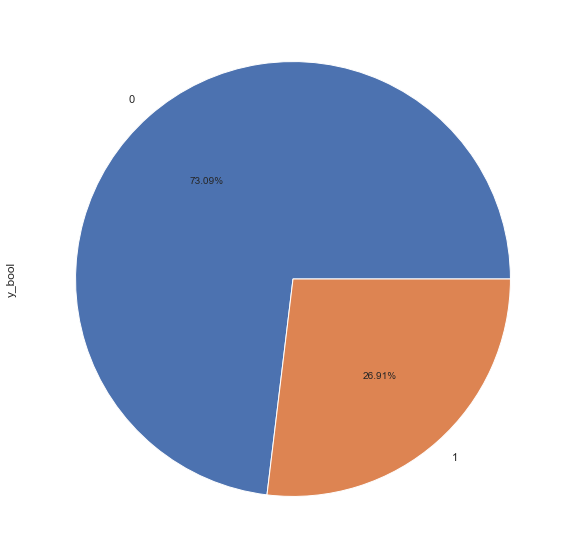

In [191]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
plt.figure(figsize=(15,10))
train.y_bool.value_counts().plot.pie(autopct="%0.2f%%");

0    15349
1     5651
Name: y_bool, dtype: int64


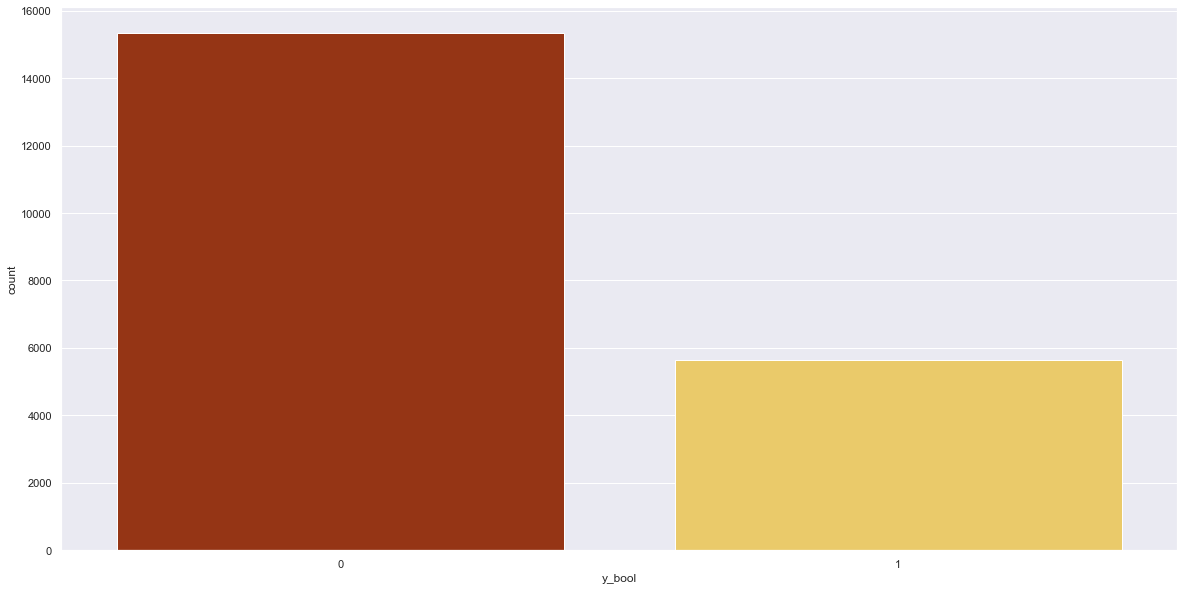

In [192]:
plt.figure(figsize=(20,10))
sns.countplot(x=train["y_bool"], palette = 'afmhot');
print(train["y_bool"].value_counts())

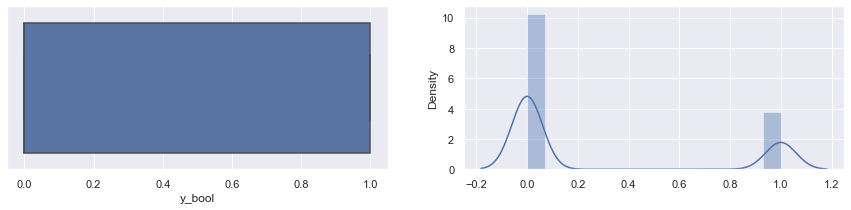

In [193]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='y_bool', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['y_bool']);

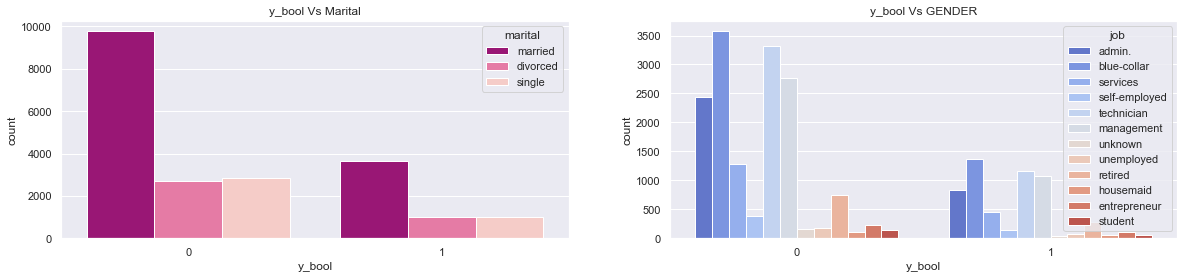

In [194]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('y_bool Vs Marital')
sns.countplot(x='y_bool',data=train,hue='marital', palette = 'RdPu_r');
plt.subplot(122)
plt.title('y_bool Vs GENDER')
sns.countplot(x='y_bool',data=train,hue='job', palette = 'coolwarm');

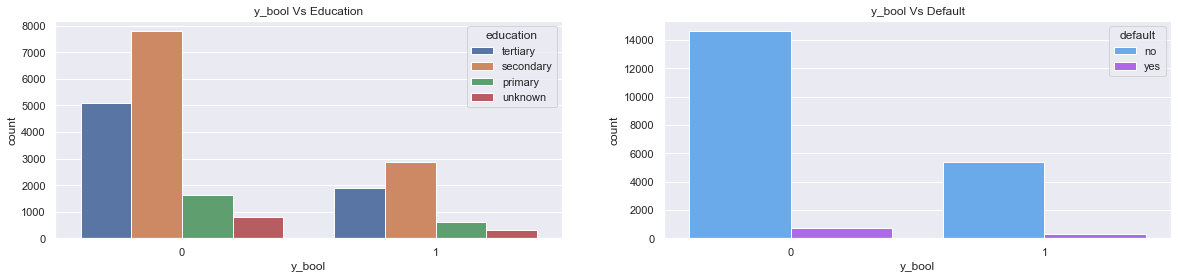

In [195]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('y_bool Vs Education')
sns.countplot(x='y_bool',data=train,hue='education');
plt.subplot(122)
plt.title('y_bool Vs Default')
sns.countplot(x='y_bool',data=train,hue='default', palette = 'cool');

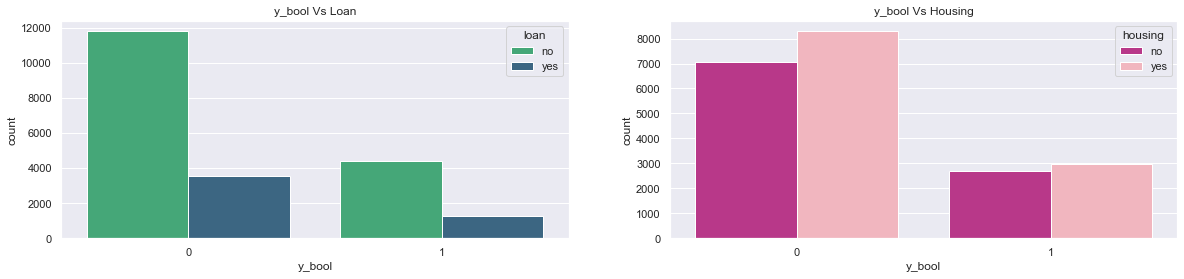

In [196]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('y_bool Vs Loan')
sns.countplot(x='y_bool',data=train,hue='loan', palette = 'viridis_r');
plt.subplot(122)
plt.title('y_bool Vs Housing')
sns.countplot(x='y_bool',data=train,hue='housing', palette = 'RdPu_r');

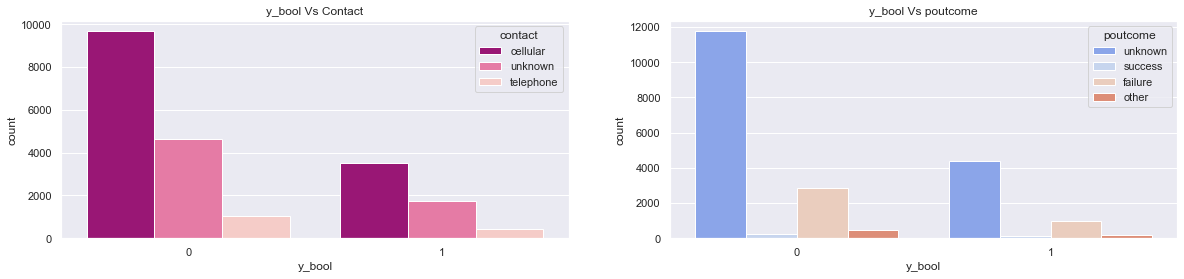

In [197]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.title('y_bool Vs Contact')
sns.countplot(x='y_bool',data=train,hue='contact', palette = 'RdPu_r');
plt.subplot(122)
plt.title('y_bool Vs poutcome')
sns.countplot(x='y_bool',data=train,hue='poutcome', palette = 'coolwarm');

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "job" Variable
- Handling "marital" Variable
- Handling "education" Variable
- Handling "default" Variable
- Handling "housing" Variable
- Handling "loan" Variable
- Handling "contact" Variable
- Handling "month" Variable
- Handling "poutcome" Variable

#### * Handling of "job" Variable

In [199]:
#train['job'].value_counts()
train['job']=train['job'].map({'blue-collar':0, 'technician':1, 'management':2, 'admin.':3, 'services':4
                              , 'retired':5, 'self-employed':6, 'entrepreneur':7, 'unemployed':8
                              , 'student':9, 'unknown':10, 'housemaid':11})
#print(train['job'])

#### * Handling of "marital" Variable

In [200]:
#train['marital'].value_counts()
train['marital']=train['marital'].map({'married':0, 'single':1, 'divorced':2})
#print(train['marital'])

#### * Handling of "education" Variable

In [201]:
#train['education'].value_counts()
train['education']=train['education'].map({'secondary':0, 'tertiary':1, 'primary':2, 'unknown':3})
#print(train['education'])

#### * Handling of "default" Variable

In [202]:
#train['default'].value_counts()
train['default']=train['default'].map({'no':0, 'yes':1})
#print(train['default'])

#### * Handling of "housing" Variable

In [203]:
#train['housing'].value_counts()
train['housing']=train['housing'].map({'no':0, 'yes':1})
#print(train['housing'])

#### * Handling of "loan" Variable

In [204]:
#train['loan'].value_counts()
train['loan']=train['loan'].map({'no':0, 'yes':1})
#print(train['loan'])

#### * Handling of "contact" Variable

In [205]:
#train['contact'].value_counts()
train['contact']=train['contact'].map({'cellular':0, 'unknown':1, 'telephone':2})
#print(train['contact'])

#### * Handling of "month" Variable

In [206]:
#train['month'].value_counts()
train['month']=train['month'].map({'jul':0, 'may':1, 'jun':2, 'nov':3, 'aug':4
                              , 'apr':5, 'feb':6, 'jan':7, 'oct':8
                              , 'sep':9, 'mar':10, 'dec':11})
#print(train['month'])

#### * Handling of "poutcome" Variable

In [207]:
#train['poutcome'].value_counts()
train['poutcome']=train['poutcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})
#print(train['poutcome'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Handling "job" Variable
- Handling "marital" Variable
- Handling "education" Variable
- Handling "default" Variable
- Handling "housing" Variable
- Handling "loan" Variable
- Handling "contact" Variable
- Handling "month" Variable
- Handling "poutcome" Variable

#### * Handling of "job" Variable

In [208]:
#test['job'].value_counts()
test['job']=test['job'].map({'blue-collar':0, 'technician':1, 'management':2, 'admin.':3, 'services':4
                              , 'retired':5, 'self-employed':6, 'entrepreneur':7, 'unemployed':8
                              , 'student':9, 'unknown':10, 'housemaid':11})
#print(test['job'])

#### * Handling of "marital" Variable

In [209]:
#test['marital'].value_counts()
test['marital']=test['marital'].map({'married':0, 'single':1, 'divorced':2})
#print(test['marital'])

#### * Handling of "education" Variable

In [210]:
#test['education'].value_counts()
test['education']=test['education'].map({'secondary':0, 'tertiary':1, 'primary':2, 'unknown':3})
#print(test['education'])

#### * Handling of "default" Variable

In [211]:
#test['default'].value_counts()
test['default']=test['default'].map({'no':0, 'yes':1})
#print(test['default'])

#### * Handling of "housing" Variable

In [212]:
#test['housing'].value_counts()
test['housing']=test['housing'].map({'no':0, 'yes':1})
#print(test['housing'])

#### * Handling of "loan" Variable

In [213]:
#test['loan'].value_counts()
test['loan']=test['loan'].map({'no':0, 'yes':1})
#print(test['loan'])

#### * Handling of "contact" Variable

In [214]:
#test['contact'].value_counts()
test['contact']=test['contact'].map({'cellular':0, 'unknown':1, 'telephone':2})
#print(test['contact'])

#### * Handling of "month" Variable

In [215]:
#test['month'].value_counts()
test['month']=test['month'].map({'jul':0, 'may':1, 'jun':2, 'nov':3, 'aug':4
                              , 'apr':5, 'feb':6, 'jan':7, 'oct':8
                              , 'sep':9, 'mar':10, 'dec':11})
#print(test['month'])

#### * Handling of "poutcome" Variable

In [216]:
#test['poutcome'].value_counts()
test['poutcome']=test['poutcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})
#print(test['poutcome'])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization(Post Processing)</h2>
</div>

- Understand more about "Train" Data

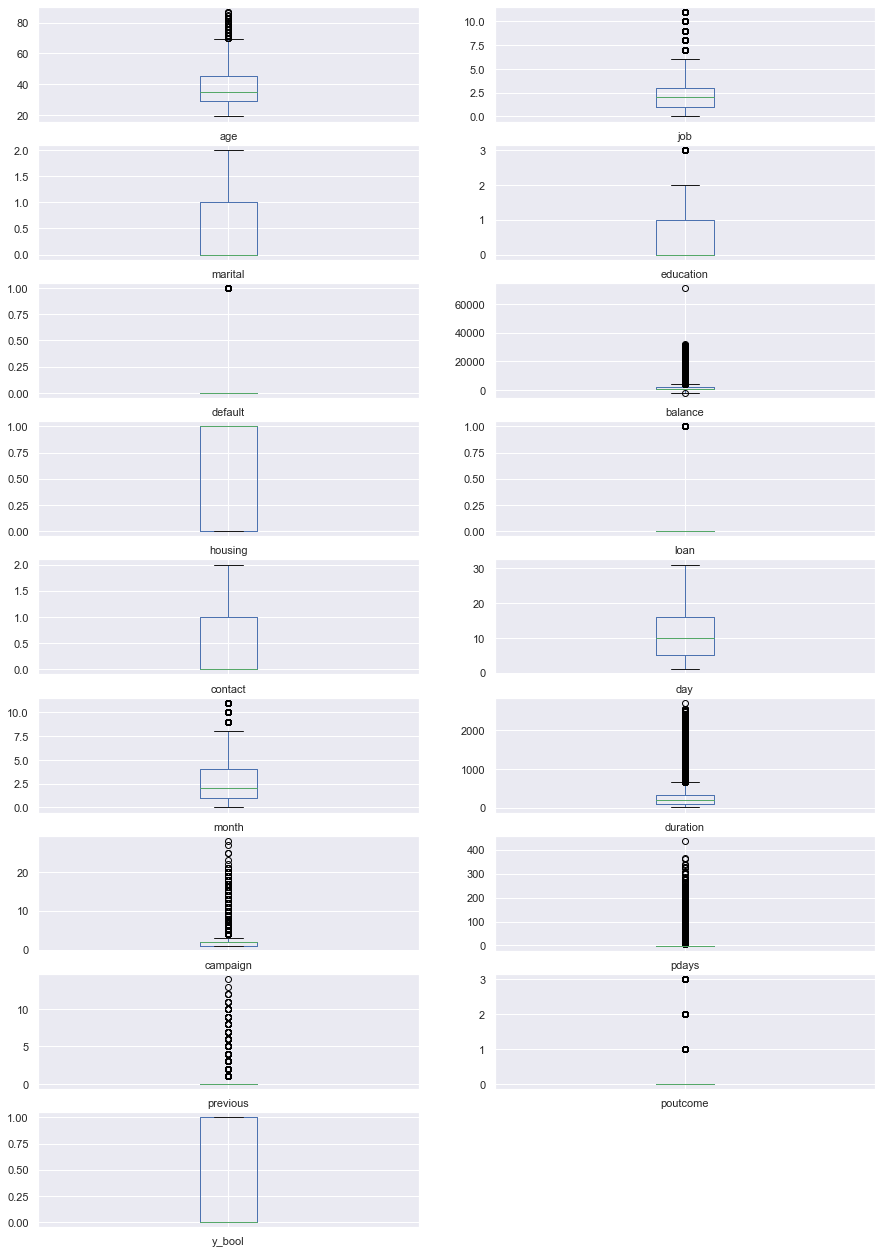

In [217]:
train.plot(kind="box",subplots=True,layout=(10,2),figsize=(15,25));

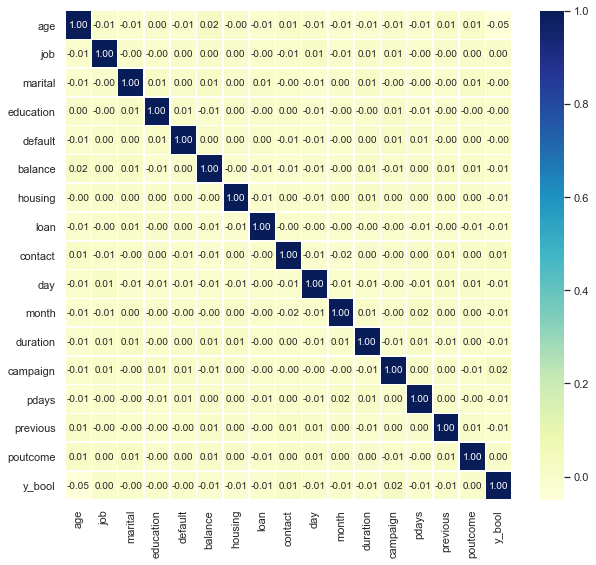

In [218]:
fig , ax = plt.subplots(figsize=(10,9))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5);

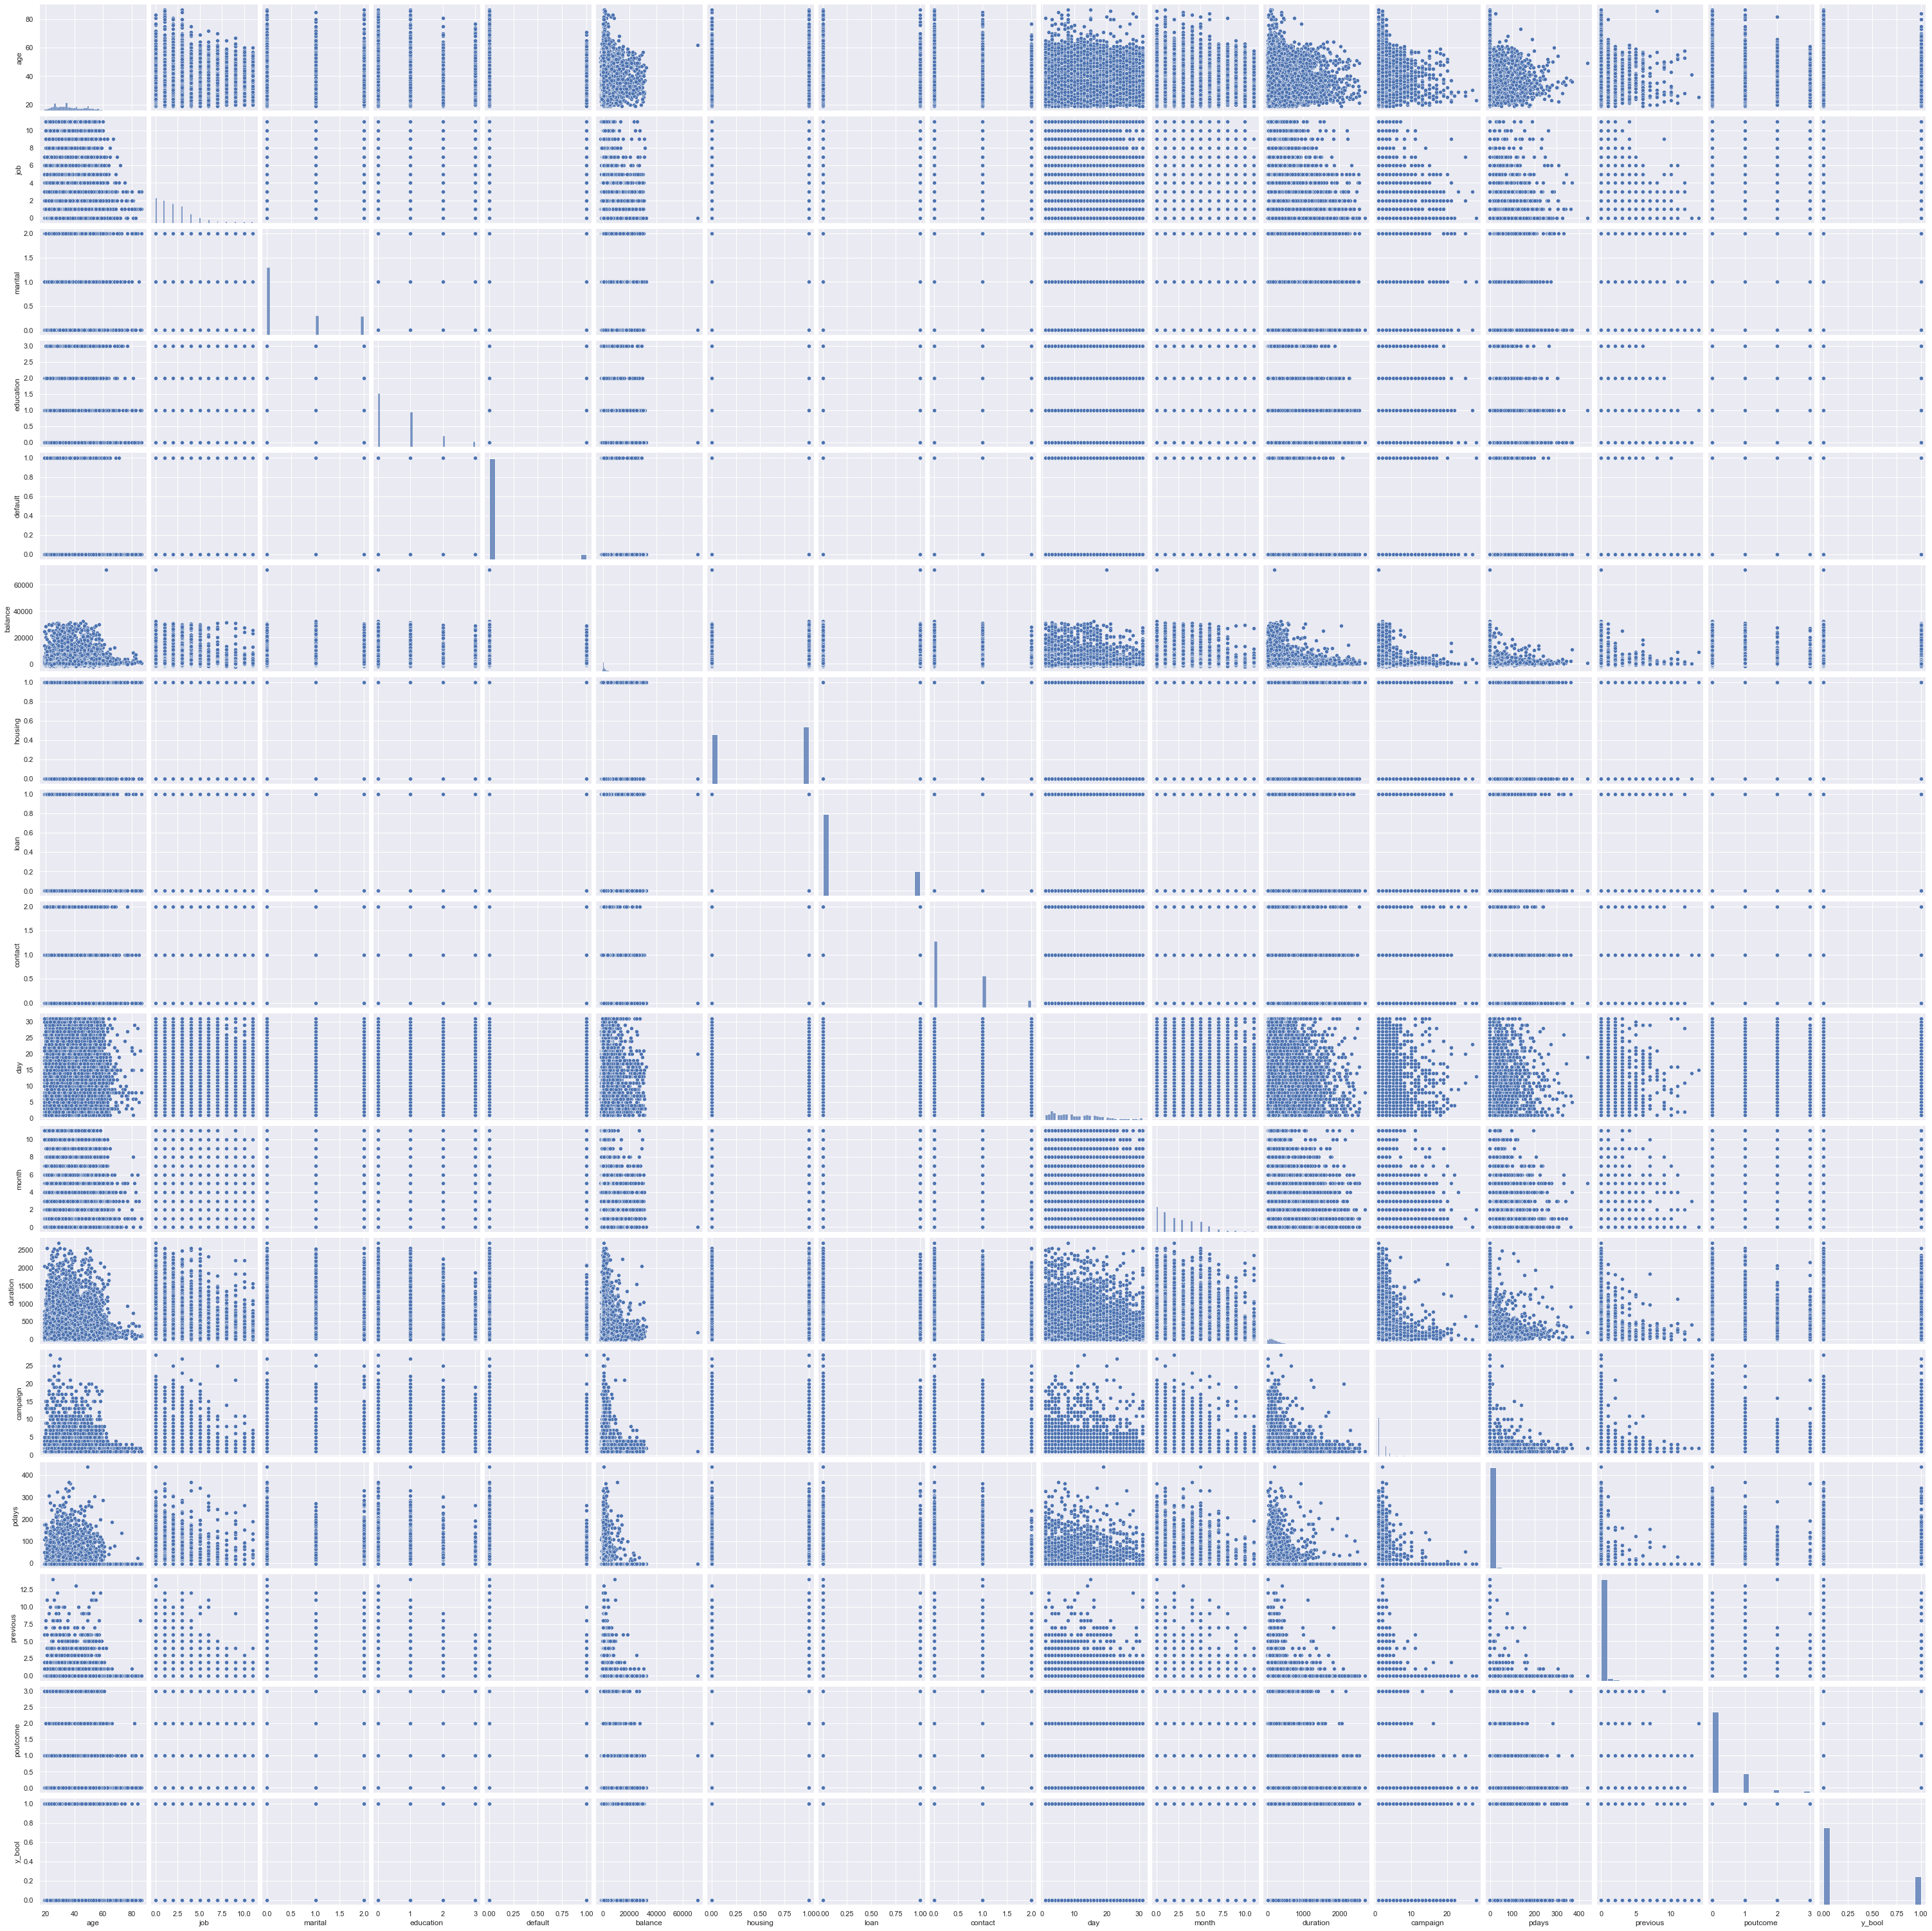

In [219]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [220]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y_bool       0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [221]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        21000 non-null  int64
 1   job        21000 non-null  int64
 2   marital    21000 non-null  int64
 3   education  21000 non-null  int64
 4   default    21000 non-null  int64
 5   balance    21000 non-null  int64
 6   housing    21000 non-null  int64
 7   loan       21000 non-null  int64
 8   contact    21000 non-null  int64
 9   day        21000 non-null  int64
 10  month      21000 non-null  int64
 11  duration   21000 non-null  int64
 12  campaign   21000 non-null  int64
 13  pdays      21000 non-null  int64
 14  previous   21000 non-null  int64
 15  poutcome   21000 non-null  int64
 16  y_bool     21000 non-null  int64
dtypes: int64(17)
memory usage: 2.7 MB


In [223]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9000 non-null   int64
 1   job        9000 non-null   int64
 2   marital    9000 non-null   int64
 3   education  9000 non-null   int64
 4   default    9000 non-null   int64
 5   balance    9000 non-null   int64
 6   housing    9000 non-null   int64
 7   loan       9000 non-null   int64
 8   contact    9000 non-null   int64
 9   day        9000 non-null   int64
 10  month      9000 non-null   int64
 11  duration   9000 non-null   int64
 12  campaign   9000 non-null   int64
 13  pdays      9000 non-null   int64
 14  previous   9000 non-null   int64
 15  poutcome   9000 non-null   int64
dtypes: int64(16)
memory usage: 1.1 MB


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [224]:
train = train.drop(['marital','education','default','housing','loan'
                    ,'contact','pdays','previous','poutcome'
                   ,'campaign','month','day'],axis=1)
test = test.drop(['marital','education','default','housing','loan'
                  ,'contact','pdays','previous','poutcome'
                 ,'campaign','month','day'],axis=1)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing and Model Building</h2>
</div>

In [225]:
y = train['y_bool']
train_temp,test_temp=train_test_split(train,test_size=0.1,random_state=0,stratify=y)

print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp)
      ,"\nLength of Test Data:-",len(test_temp))

features=list(train.columns); label='y_bool'; features.remove(label)
print('-------------'*9)
print("\nFEATURES ARE:-",features)
print('-------------'*9)
print("\nLABELS ARE:-",label)
print('-------------'*9)

X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

print(train['y_bool'].value_counts())
print('-------------'*9)

print("\nScale Pos Weight is:-\n",15349/5651)

Length of Original Data:- 21000 
Length of Train Data:- 18900 
Length of Test Data:- 2100
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['age', 'job', 'balance', 'duration']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- y_bool
---------------------------------------------------------------------------------------------------------------------
0    15349
1     5651
Name: y_bool, dtype: int64
---------------------------------------------------------------------------------------------------------------------

Scale Pos Weight is:-
 2.7161564324898246


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1-  Logistic Regression</h2>
</div>

In [226]:
model1 = LogisticRegression(random_state=42, class_weight='balanced')

model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model1.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Logistic Regression on training set: 0.50
Accuracy of Logistic Regression on test set: 0.50
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.48      0.58      1535
           1       0.28      0.55      0.37       565

    accuracy                           0.50      2100
   macro avg       0.51      0.51      0.48      2100
weighted avg       0.62      0.50      0.52      2100
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 17.42137856098008 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [227]:
model2 = LogisticRegression(C=4.432, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression(Best Hyperparameters) on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression(Best Hyperparameters) on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')
print('-------------'*9)   
Log_Loss = log_loss(y_train, model2.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')
print('-------------'*9)  

Accuracy of Logistic Regression(Best Hyperparameters) on training set: 0.50
Accuracy of Logistic Regression(Best Hyperparameters) on test set: 0.50
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.48      0.58      1535
           1       0.28      0.55      0.37       565

    accuracy                           0.50      2100
   macro avg       0.51      0.51      0.48      2100
weighted avg       0.62      0.50      0.52      2100
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 17.419551027880093 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Gradient Boosting Classifier</h2>
</div>

In [228]:
model3 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.163, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_samples_leaf=1,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=220, n_iter_no_change=None,
                           random_state=123, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

model3.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model3.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')
print('-------------'*9)

Accuracy of Gradient Boosting Classifier on training set: 0.73
Accuracy of Gradient Boosting Classifier on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1535
           1       0.00      0.00      0.00       565

    accuracy                           0.73      2100
   macro avg       0.37      0.50      0.42      2100
weighted avg       0.53      0.73      0.62      2100
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 9.276128813637493 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Quadratic Discriminant Analysis</h2>
</div>

In [229]:
model4 = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.41,
                              store_covariance=False, tol=0.0001)
model4.fit(X_train,y_train) 
print('Accuracy of Quadratic Discriminant Analysis on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Quadratic Discriminant Analysis on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model4.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')
print('-------------'*9)

Accuracy of Quadratic Discriminant Analysis on training set: 0.73
Accuracy of Quadratic Discriminant Analysis on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1535
           1       0.00      0.00      0.00       565

    accuracy                           0.73      2100
   macro avg       0.37      0.50      0.42      2100
weighted avg       0.53      0.73      0.62      2100
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 9.294403002355333 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- LGBM Classifier</h2>
</div>

In [230]:
train1 = lgb.Dataset(data = X_train,label = y_train,free_raw_data = False);
eval1 = lgb.Dataset(data = X_test,label = y_test,reference = train1,free_raw_data = False);

params = {'objective': 'binary','metric': 'binary_logloss','boosting': 'gbdt'
          ,'num_leaves': 64,'learning_rate': 0.09,'force_row_wise': True
          , 'verbose': 0};
evals_result={};
model5 = lgb.train(params,train1,valid_sets = eval1,num_boost_round = 1000
                   ,early_stopping_rounds = 200,evals_result = evals_result);

print('-------------'*9)
Log_Loss = log_loss(y_train, model5.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')
print('-------------'*9)

[1]	valid_0's binary_logloss: 0.581584
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.581338
[3]	valid_0's binary_logloss: 0.581084
[4]	valid_0's binary_logloss: 0.58031
[5]	valid_0's binary_logloss: 0.579682
[6]	valid_0's binary_logloss: 0.579815
[7]	valid_0's binary_logloss: 0.579622
[8]	valid_0's binary_logloss: 0.579527
[9]	valid_0's binary_logloss: 0.579732
[10]	valid_0's binary_logloss: 0.579765
[11]	valid_0's binary_logloss: 0.579965
[12]	valid_0's binary_logloss: 0.579682
[13]	valid_0's binary_logloss: 0.579434
[14]	valid_0's binary_logloss: 0.579091
[15]	valid_0's binary_logloss: 0.57886
[16]	valid_0's binary_logloss: 0.579039
[17]	valid_0's binary_logloss: 0.579228
[18]	valid_0's binary_logloss: 0.579648
[19]	valid_0's binary_logloss: 0.57972
[20]	valid_0's binary_logloss: 0.579466
[21]	valid_0's binary_logloss: 0.579322
[22]	valid_0's binary_logloss: 0.579143
[23]	valid_0's binary_logloss: 0.579476
[24]	valid_0's binary_logloss:

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 0.5612031354531731 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- CatBoost Classifier</h2>
</div>

In [231]:
model6 = CatBoostClassifier(random_state=0, scale_pos_weight = 0.87)
model6.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model6.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model6.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')
print('-------------'*9)

Learning rate set to 0.03614
0:	learn: 0.6826522	total: 8.21ms	remaining: 8.2s
1:	learn: 0.6729764	total: 15.7ms	remaining: 7.85s
2:	learn: 0.6639175	total: 23.7ms	remaining: 7.87s
3:	learn: 0.6555607	total: 30.6ms	remaining: 7.62s
4:	learn: 0.6478435	total: 37.9ms	remaining: 7.54s
5:	learn: 0.6406956	total: 44.4ms	remaining: 7.36s
6:	learn: 0.6340904	total: 51.3ms	remaining: 7.27s
7:	learn: 0.6279700	total: 59.7ms	remaining: 7.4s
8:	learn: 0.6222721	total: 67.1ms	remaining: 7.38s
9:	learn: 0.6170835	total: 73.2ms	remaining: 7.25s
10:	learn: 0.6122464	total: 79.4ms	remaining: 7.13s
11:	learn: 0.6077663	total: 86.2ms	remaining: 7.09s
12:	learn: 0.6036722	total: 92ms	remaining: 6.98s
13:	learn: 0.5999063	total: 95.8ms	remaining: 6.75s
14:	learn: 0.5963617	total: 102ms	remaining: 6.71s
15:	learn: 0.5930724	total: 108ms	remaining: 6.67s
16:	learn: 0.5900218	total: 114ms	remaining: 6.62s
17:	learn: 0.5871997	total: 122ms	remaining: 6.67s
18:	learn: 0.5846087	total: 131ms	remaining: 6.76s
19

161:	learn: 0.5450953	total: 1.63s	remaining: 8.44s
162:	learn: 0.5450216	total: 1.64s	remaining: 8.43s
163:	learn: 0.5449580	total: 1.65s	remaining: 8.43s
164:	learn: 0.5449168	total: 1.67s	remaining: 8.43s
165:	learn: 0.5448770	total: 1.67s	remaining: 8.41s
166:	learn: 0.5448335	total: 1.69s	remaining: 8.41s
167:	learn: 0.5447647	total: 1.7s	remaining: 8.4s
168:	learn: 0.5447358	total: 1.71s	remaining: 8.4s
169:	learn: 0.5446690	total: 1.72s	remaining: 8.4s
170:	learn: 0.5446232	total: 1.73s	remaining: 8.4s
171:	learn: 0.5445979	total: 1.74s	remaining: 8.4s
172:	learn: 0.5445487	total: 1.75s	remaining: 8.39s
173:	learn: 0.5445085	total: 1.77s	remaining: 8.39s
174:	learn: 0.5444658	total: 1.78s	remaining: 8.39s
175:	learn: 0.5444165	total: 1.79s	remaining: 8.4s
176:	learn: 0.5444159	total: 1.8s	remaining: 8.37s
177:	learn: 0.5443633	total: 1.81s	remaining: 8.37s
178:	learn: 0.5443264	total: 1.82s	remaining: 8.37s
179:	learn: 0.5442768	total: 1.84s	remaining: 8.37s
180:	learn: 0.544270

322:	learn: 0.5375896	total: 3.37s	remaining: 7.06s
323:	learn: 0.5375340	total: 3.38s	remaining: 7.05s
324:	learn: 0.5374768	total: 3.39s	remaining: 7.04s
325:	learn: 0.5374003	total: 3.4s	remaining: 7.03s
326:	learn: 0.5373455	total: 3.41s	remaining: 7.02s
327:	learn: 0.5372623	total: 3.42s	remaining: 7s
328:	learn: 0.5371942	total: 3.43s	remaining: 6.99s
329:	learn: 0.5371637	total: 3.44s	remaining: 6.98s
330:	learn: 0.5371358	total: 3.45s	remaining: 6.97s
331:	learn: 0.5370635	total: 3.46s	remaining: 6.96s
332:	learn: 0.5369977	total: 3.47s	remaining: 6.95s
333:	learn: 0.5369536	total: 3.48s	remaining: 6.94s
334:	learn: 0.5369061	total: 3.49s	remaining: 6.93s
335:	learn: 0.5368520	total: 3.5s	remaining: 6.92s
336:	learn: 0.5367840	total: 3.51s	remaining: 6.9s
337:	learn: 0.5366951	total: 3.52s	remaining: 6.89s
338:	learn: 0.5366287	total: 3.53s	remaining: 6.88s
339:	learn: 0.5365751	total: 3.54s	remaining: 6.87s
340:	learn: 0.5365298	total: 3.55s	remaining: 6.86s
341:	learn: 0.5364

488:	learn: 0.5288510	total: 5.1s	remaining: 5.33s
489:	learn: 0.5288014	total: 5.11s	remaining: 5.32s
490:	learn: 0.5287323	total: 5.12s	remaining: 5.3s
491:	learn: 0.5287015	total: 5.13s	remaining: 5.29s
492:	learn: 0.5286697	total: 5.13s	remaining: 5.28s
493:	learn: 0.5286246	total: 5.14s	remaining: 5.27s
494:	learn: 0.5285756	total: 5.15s	remaining: 5.26s
495:	learn: 0.5285342	total: 5.16s	remaining: 5.25s
496:	learn: 0.5284685	total: 5.17s	remaining: 5.24s
497:	learn: 0.5284214	total: 5.18s	remaining: 5.22s
498:	learn: 0.5284016	total: 5.19s	remaining: 5.21s
499:	learn: 0.5283367	total: 5.2s	remaining: 5.2s
500:	learn: 0.5282853	total: 5.21s	remaining: 5.19s
501:	learn: 0.5282467	total: 5.22s	remaining: 5.18s
502:	learn: 0.5281816	total: 5.23s	remaining: 5.17s
503:	learn: 0.5281184	total: 5.24s	remaining: 5.16s
504:	learn: 0.5281087	total: 5.25s	remaining: 5.14s
505:	learn: 0.5280483	total: 5.26s	remaining: 5.13s
506:	learn: 0.5279965	total: 5.27s	remaining: 5.12s
507:	learn: 0.52

648:	learn: 0.5212166	total: 6.79s	remaining: 3.67s
649:	learn: 0.5211838	total: 6.8s	remaining: 3.66s
650:	learn: 0.5211450	total: 6.82s	remaining: 3.65s
651:	learn: 0.5210811	total: 6.83s	remaining: 3.64s
652:	learn: 0.5210614	total: 6.84s	remaining: 3.63s
653:	learn: 0.5210023	total: 6.85s	remaining: 3.62s
654:	learn: 0.5209539	total: 6.86s	remaining: 3.61s
655:	learn: 0.5209063	total: 6.87s	remaining: 3.6s
656:	learn: 0.5208524	total: 6.88s	remaining: 3.59s
657:	learn: 0.5208017	total: 6.9s	remaining: 3.58s
658:	learn: 0.5207594	total: 6.91s	remaining: 3.57s
659:	learn: 0.5207044	total: 6.92s	remaining: 3.56s
660:	learn: 0.5206464	total: 6.93s	remaining: 3.55s
661:	learn: 0.5205965	total: 6.94s	remaining: 3.54s
662:	learn: 0.5205461	total: 6.95s	remaining: 3.53s
663:	learn: 0.5204975	total: 6.96s	remaining: 3.52s
664:	learn: 0.5204618	total: 6.98s	remaining: 3.51s
665:	learn: 0.5204117	total: 6.99s	remaining: 3.5s
666:	learn: 0.5203759	total: 7s	remaining: 3.49s
667:	learn: 0.52035

809:	learn: 0.5140901	total: 8.44s	remaining: 1.98s
810:	learn: 0.5140370	total: 8.45s	remaining: 1.97s
811:	learn: 0.5140228	total: 8.46s	remaining: 1.96s
812:	learn: 0.5139830	total: 8.47s	remaining: 1.95s
813:	learn: 0.5139053	total: 8.48s	remaining: 1.94s
814:	learn: 0.5138665	total: 8.48s	remaining: 1.93s
815:	learn: 0.5138208	total: 8.49s	remaining: 1.92s
816:	learn: 0.5137908	total: 8.5s	remaining: 1.9s
817:	learn: 0.5137235	total: 8.51s	remaining: 1.89s
818:	learn: 0.5136832	total: 8.52s	remaining: 1.88s
819:	learn: 0.5136302	total: 8.53s	remaining: 1.87s
820:	learn: 0.5136015	total: 8.54s	remaining: 1.86s
821:	learn: 0.5135611	total: 8.55s	remaining: 1.85s
822:	learn: 0.5134934	total: 8.56s	remaining: 1.84s
823:	learn: 0.5134384	total: 8.57s	remaining: 1.83s
824:	learn: 0.5134014	total: 8.58s	remaining: 1.82s
825:	learn: 0.5133600	total: 8.59s	remaining: 1.81s
826:	learn: 0.5133320	total: 8.6s	remaining: 1.8s
827:	learn: 0.5132995	total: 8.61s	remaining: 1.79s
828:	learn: 0.51

975:	learn: 0.5069786	total: 10.1s	remaining: 247ms
976:	learn: 0.5069252	total: 10.1s	remaining: 237ms
977:	learn: 0.5068802	total: 10.1s	remaining: 227ms
978:	learn: 0.5068311	total: 10.1s	remaining: 216ms
979:	learn: 0.5067940	total: 10.1s	remaining: 206ms
980:	learn: 0.5067409	total: 10.1s	remaining: 196ms
981:	learn: 0.5066928	total: 10.1s	remaining: 186ms
982:	learn: 0.5066428	total: 10.1s	remaining: 175ms
983:	learn: 0.5066071	total: 10.1s	remaining: 165ms
984:	learn: 0.5065470	total: 10.1s	remaining: 155ms
985:	learn: 0.5065191	total: 10.2s	remaining: 144ms
986:	learn: 0.5064627	total: 10.2s	remaining: 134ms
987:	learn: 0.5064196	total: 10.2s	remaining: 124ms
988:	learn: 0.5063830	total: 10.2s	remaining: 113ms
989:	learn: 0.5063235	total: 10.2s	remaining: 103ms
990:	learn: 0.5062692	total: 10.2s	remaining: 92.7ms
991:	learn: 0.5062110	total: 10.2s	remaining: 82.4ms
992:	learn: 0.5061705	total: 10.2s	remaining: 72ms
993:	learn: 0.5061293	total: 10.2s	remaining: 61.7ms
994:	learn

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Random Forest Classifier</h2>
</div>

In [232]:
model7 = RandomForestClassifier(n_estimators = 198, min_samples_split = 5
                                 , min_samples_leaf = 10, max_features = 'log2'
                                 , max_depth = 8, bootstrap = False, random_state=0)
model7.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model7.predict(X_test)),'\n')
print('-------------'*9)
Log_Loss = log_loss(y_train, model7.predict(X_train), eps = 1e-15,normalize = True, sample_weight = None, labels = None)
print('Log Loss Metric is :\n\n',Log_Loss,'\n')

Accuracy of Random Forest Classifier on training set: 0.73
Accuracy of Random Forest Classifier on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1535
           1       0.45      0.01      0.02       565

    accuracy                           0.73      2100
   macro avg       0.59      0.50      0.43      2100
weighted avg       0.66      0.73      0.62      2100
 

---------------------------------------------------------------------------------------------------------------------
Log Loss Metric is :

 9.171964546054006 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [233]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict_proba(x) #Score:-0.69546
# Prediction using Model 2
y_pred2 = model2.predict_proba(x) #Score:-0.69545
# Prediction using Model 3
y_pred3 = model3.predict_proba(x) #Score:-0.56948
# Prediction using Model 4
y_pred4 = model4.predict_proba(x) #Score:-0.59613
# Prediction using Model 5
y_pred5 = model5.predict(x) #Score:-0.56605
# Prediction using Model 6
y_pred6 = model6.predict_proba(x) #Score:-0.57707
# Prediction using Model 7
y_pred7 = model7.predict_proba(x) #Score:-0.57062

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [234]:
# Final Prediction using Model5
y_pred = y_pred5

df1=pd.DataFrame(y_pred,columns=['y_bool'])
submission1 = submission.drop(['y_bool'], axis=1)
final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv(r'C:\Users\abarphe\Favorites\MH\SPTS\Best_Final_Submission_Aniiket_Barphe.csv',index=False)

print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

**1) Public Leaderboard :-** 0.56605

**2) Private Leaderboard :-** 0.58154


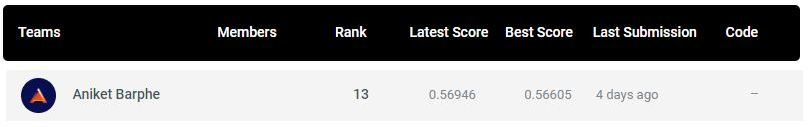

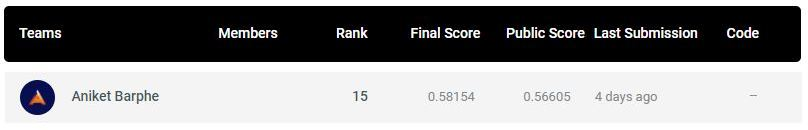

**Competition Link:-** https://machinehack.com/hackathons/subscriber_prediction_talent_search_hackathon/leaderboard

**Rank Scored:-**

a) **13** out of **496** registered participants (Public Leaderboard)

b) **15** out of **496** registered participants (Private Leaderboard)